In [25]:
import math
import random
from collections import defaultdict, Counter, deque
from typing import Tuple, List, Set, Dict, Counter
from typing import Any, Sequence, Mapping, Iterable, Iterator
from itertools import product, chain, islice
import doctest
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import colorama
from colorama import Fore

In [2]:
#change this for different models 

maxelogain = 32
number_players = 200 #must be even
games= 500
monte_n = 500

In [3]:
class Player:
    """A player with real skill and obvservable elo.
    
    >>> Player('p1', '', '1000')  # test robustness
    Traceback (most recent call last):
        ...
    AssertionError: Must not be empty
    >>> playerA = Player('p1',1001, 1000)
    >>> playerA  # also tests __repr__()
    Player(1001, 1000)
    >>> playerA.update(10)
    >>> print(playerA)  # also tests __str__()
    (1001,1010)
    """
    def __init__(self,name:str, skill: int, elo:int) -> None:
        """Create player with given state.
        """
        assert name and skill and elo, "Must not be empty"
        self.skill: int = skill
        self.elo: int = elo
        self.name: str = name
            
    def __repr__(self) -> str:
        """Return machine-processable string representation of current state.
        """
        return f"Player({str(self.skill)}, {str(self.elo)})"
    
    def __str__(self) -> str:
        """Return human-readable string representation of current state.
        """
        return f"({self.skill},{self.elo})"
    
    def update(self, gain : int) -> None:
        """ Update the elo after a match"""
        self.elo = self.elo + gain

In [4]:
#doctest.run_docstring_examples(Player, globals(), verbose=True, name="Player")

In [5]:
def match_chess(player1 : Player, player2: Player)->None:
    P1win = 1/(1+10**((player2.skill - player1.skill)/400))
    P1expec = 1/(1+10**((player2.elo - player1.elo)/400))
    res = random.random()
    
    if res <= P1win:
        player1.update( int(maxelogain*(1-P1expec)) ) 
        player2.update( int(maxelogain*(0-1*(1-P1expec) )))
    elif res > P1win:
        player1.update( int(maxelogain*(0-P1expec) ) )
        player2.update( int(maxelogain*(1-1*(1-P1expec) )))

In [6]:
def ranked(players:List[Player]):
    players2=players.copy()
    elos = [i.elo for i in players2]
    elos.sort()
    for i in range(len(elos)):
        elo = elos[i]
        for p in players2:
            if p.elo == elo:
                elos[i]=p
                players2.remove(p)
                break
    return elos

In [7]:
def ranked_true(players:List[Player]):
    players2=players.copy()
    elos = [i.skill for i in players2]
    elos.sort()
    for i in range(len(elos)):
        elo = elos[i]
        for p in players2:
            if p.skill == elo:
                elos[i]=p
                players2.remove(p)
                break
    return elos

In [8]:
def rand_matchmaking(players:List[Player]) -> List[Player]:
    random.shuffle(players)
    return players
        

In [9]:
def chess_round(players:List[Player]) -> None:
    order = rand_matchmaking(players)
    for i in range(len(players))[::2]:
        match_chess(order[i], order[i+1])

In [10]:
def state(players:List[Player]):
    players2 = players.copy()
    state= [[i.name,i.skill, i.elo] for i in players2]
    return state

In [11]:
def chess_game(players:List[Player], games : int) -> List[List[Player]]:
    global Match_history 
    Match_history = [i for i in range(games+1)]
    for i in range(games):
        Match_history[i] = state(players)
        chess_round(players)
    Match_history[-1] = state(players)
    return Match_history

In [12]:
def Conv(lst:List[int], n:int)-> List[int]:
    conv = [lst[0]] + [(1/3)*(lst[i-1]+lst[i]+lst[i+1]) for i in range(1, n-1)] + [lst[n-1]]
    return conv

In [13]:
def player_hist(player: str, match_hist):
    elos = []
    for state in match_hist:
        for p in state:
            if p[0] == player:  
                elos += [p[2]]
    return elos

In [14]:
def summ_i(all_the_lines: List[List[int]], x:int)->float:
    all_is = [all_the_lines[i][x] for i in range(monte_n)]
    return sum(all_is)/len(all_is)

In [15]:
player_names = ['p'+str(i) for i in range(1,number_players+1)]
player_skills = [ random.randint(1,2800) for i in range(1,number_players+1)]

players = [Player(player_names[i],  player_skills[i], 1000) for i in range(number_players)]

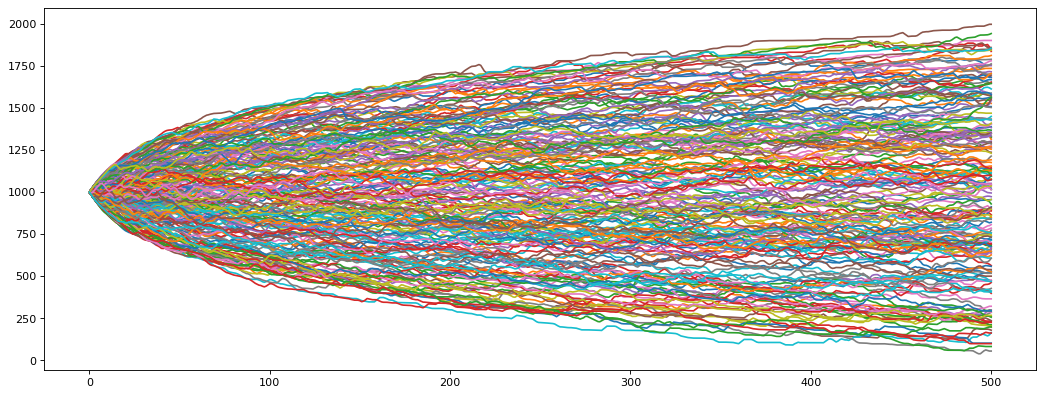

In [16]:
#a single simulation of 20 players and 100 games of chess throughout time
chess_game(players, games) 

#The graph of how each player's elo developed over the 100 games
x = range(games+1)     #+5
all_the_ys = [player_hist('p'+str(i),Match_history) for i in range(1,number_players+1)]
figure(figsize=(16, 6), dpi=80)

for i in range(len(all_the_ys)):   
    plt.plot(x, Conv(all_the_ys[i], games+1), label = "Player "+str(i+1))    #+5*[all_the_ys[i][-1]
plt.show()

In [17]:
#How does the elo ranking compare to the real skill ranking?

print('Final ranking: '+ str([i.name for i in ranked(players)]))
print('Real ranking: ' + str([i.name for i in ranked_true(players)]) )

Final ranking: ['p68', 'p83', 'p74', 'p71', 'p174', 'p60', 'p6', 'p12', 'p173', 'p109', 'p69', 'p103', 'p114', 'p39', 'p64', 'p94', 'p96', 'p63', 'p93', 'p169', 'p58', 'p107', 'p108', 'p161', 'p153', 'p75', 'p147', 'p67', 'p124', 'p150', 'p48', 'p200', 'p198', 'p154', 'p70', 'p180', 'p55', 'p167', 'p146', 'p138', 'p131', 'p162', 'p11', 'p176', 'p81', 'p44', 'p88', 'p50', 'p22', 'p15', 'p37', 'p134', 'p160', 'p192', 'p148', 'p62', 'p185', 'p171', 'p59', 'p3', 'p133', 'p76', 'p40', 'p72', 'p164', 'p137', 'p90', 'p10', 'p111', 'p196', 'p30', 'p112', 'p139', 'p170', 'p98', 'p8', 'p47', 'p77', 'p151', 'p168', 'p130', 'p52', 'p159', 'p29', 'p24', 'p84', 'p4', 'p7', 'p179', 'p78', 'p87', 'p186', 'p61', 'p123', 'p129', 'p31', 'p125', 'p25', 'p116', 'p197', 'p120', 'p105', 'p189', 'p43', 'p117', 'p187', 'p5', 'p175', 'p101', 'p194', 'p19', 'p143', 'p121', 'p184', 'p110', 'p20', 'p89', 'p132', 'p73', 'p21', 'p144', 'p17', 'p122', 'p2', 'p152', 'p38', 'p149', 'p16', 'p142', 'p85', 'p23', 'p172', 

In [18]:
#for montecarlo sim, we use the same players and run a bunch (100) of simulations of games
Lotta_games = []

for i in range(monte_n):
    players = [Player(player_names[i],  player_skills[i], 1000) for i in range(number_players)]
    Lotta_games += [chess_game(players, games)]

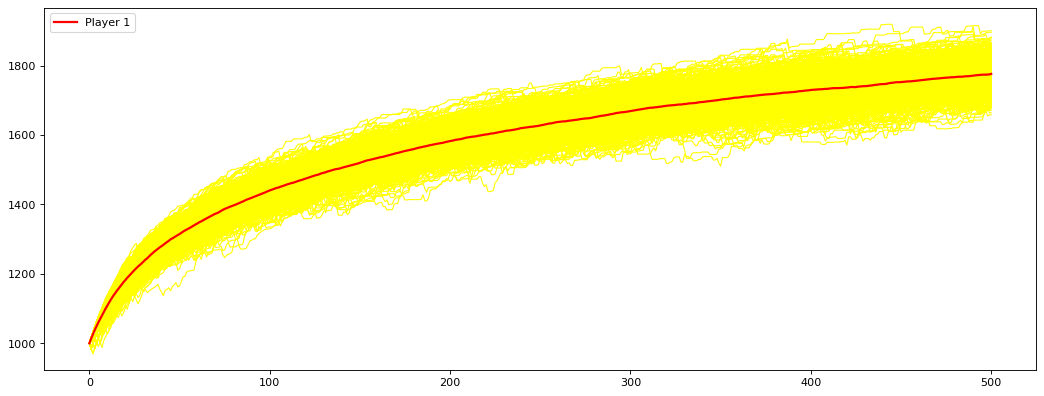

In [19]:
#For a single player , this is 100 simulations of how their 100 games (x axis) could have gone, we will average
#to find how well they're expected to do:

player_n = 1 #what player do we want to look at

x = range(games+1)  
all_the_lines = [player_hist('p'+str(player_n),Lotta_games[i]) for i in range(monte_n)]
figure(figsize=(16, 6), dpi=80)


for i in range(len(all_the_lines)):
    plt.plot(x, all_the_lines[i],linewidth=1, color='yellow') 
    
plt.plot(x, [summ_i(all_the_lines, x) for x in range(games+1)], label = "Player "+str(player_n), color='red', linewidth=2 )





plt.legend()
plt.show()

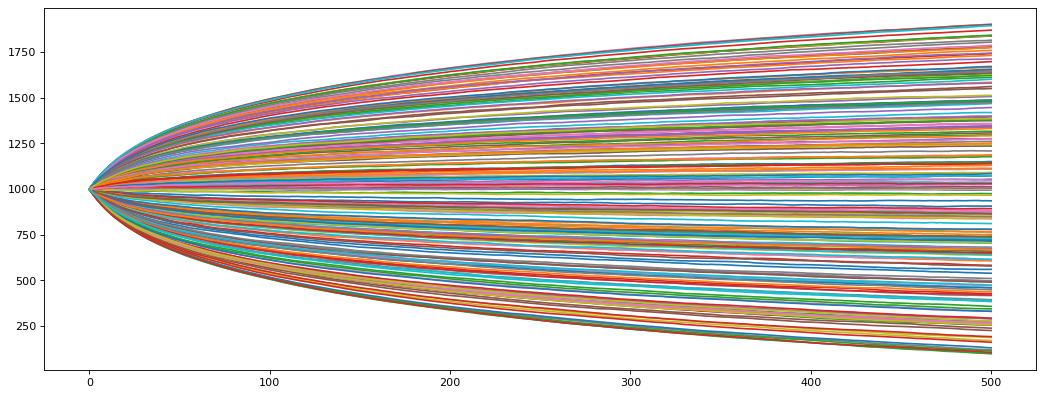

In [20]:
#we can now graph all players after doing montecarlo

x = range(games+1) 
figure(figsize=(16, 6), dpi=80) 

final_score_mcrlo=[]

for playerr in range(1, number_players+1):
    player_n = playerr #what player do we want to look at
    all_the_lines = [player_hist('p'+str(player_n),Lotta_games[i]) for i in range(monte_n)]
    y_avgi = [summ_i(all_the_lines, x) for x in range(games+1)]
    final_score_mcrlo += [[playerr, y_avgi[-1]]]
    plt.plot(x,y_avgi , label = "Player "+str(player_n) )

    
#plt.legend()
plt.show()

In [21]:
def Sort_mcrlo(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li

In [22]:
#real rankings vs expected (average) rankings of players:
print('Real ranking: ' + str([i.name for i in ranked_true(players)]) )
print('Average ranking: ' +str(['p'+str(i[0]) for i in Sort_mcrlo(final_score_mcrlo)]) )

Real ranking: ['p83', 'p60', 'p174', 'p173', 'p68', 'p71', 'p74', 'p39', 'p69', 'p94', 'p96', 'p6', 'p63', 'p64', 'p109', 'p107', 'p12', 'p147', 'p103', 'p169', 'p58', 'p75', 'p114', 'p161', 'p67', 'p153', 'p93', 'p150', 'p200', 'p108', 'p48', 'p124', 'p154', 'p162', 'p198', 'p131', 'p70', 'p167', 'p180', 'p146', 'p138', 'p55', 'p88', 'p11', 'p81', 'p176', 'p44', 'p22', 'p37', 'p50', 'p59', 'p160', 'p134', 'p164', 'p3', 'p192', 'p185', 'p15', 'p137', 'p98', 'p40', 'p30', 'p90', 'p139', 'p111', 'p171', 'p148', 'p76', 'p170', 'p8', 'p133', 'p196', 'p72', 'p112', 'p10', 'p62', 'p151', 'p130', 'p47', 'p179', 'p52', 'p168', 'p159', 'p77', 'p4', 'p24', 'p186', 'p123', 'p29', 'p78', 'p87', 'p7', 'p84', 'p61', 'p31', 'p189', 'p43', 'p125', 'p129', 'p175', 'p116', 'p187', 'p105', 'p194', 'p25', 'p120', 'p197', 'p5', 'p101', 'p110', 'p121', 'p89', 'p19', 'p20', 'p117', 'p132', 'p122', 'p184', 'p144', 'p143', 'p21', 'p73', 'p2', 'p17', 'p152', 'p38', 'p136', 'p9', 'p149', 'p172', 'p158', 'p127', 

In [33]:
for r in range(number_players):
    if [i.name for i in ranked_true(players)][r] == ['p'+str(i[0]) for i in Sort_mcrlo(final_score_mcrlo)][r]:
        print(Fore.GREEN + str(r), [i.name for i in ranked_true(players)][r],['p'+str(i[0]) for i in Sort_mcrlo(final_score_mcrlo)][r] )
    else:
        print(Fore.RED + str(r), [i.name for i in ranked_true(players)][r],['p'+str(i[0]) for i in Sort_mcrlo(final_score_mcrlo)][r] )


0 p83 p83
1 p60 p60
2 p174 p174
3 p173 p173
4 p68 p68
5 p71 p71
6 p74 p74
7 p39 p39
8 p69 p69
9 p94 p94
10 p96 p96
11 p6 p6
12 p63 p63
13 p64 p64
14 p109 p109
15 p107 p107
16 p12 p12
17 p147 p147
18 p103 p103
19 p169 p169
20 p58 p58
21 p75 p75
22 p114 p114
23 p161 p161
24 p67 p67
25 p153 p153
26 p93 p93
27 p150 p150
28 p200 p200
29 p108 p108
30 p48 p48
31 p124 p124
32 p154 p154
33 p162 p162
34 p198 p198
35 p131 p131
36 p70 p70
37 p167 p167
38 p180 p180
39 p146 p146
40 p138 p138
41 p55 p55
42 p88 p88
43 p11 p11
44 p81 p81
45 p176 p176
46 p44 p44
47 p22 p22
48 p37 p37
49 p50 p50
50 p59 p59
51 p160 p160
52 p134 p134
53 p164 p164
54 p3 p3
55 p192 p192
56 p185 p185
57 p15 p15
58 p137 p137
59 p98 p98
60 p40 p40
61 p30 p90
62 p90 p30
63 p139 p139
64 p111 p111
65 p171 p171
66 p148 p148
67 p76 p170
68 p170 p76
69 p8 p8
70 p133 p133
71 p196 p196
72 p72 p72
73 p112 p10
74 p10 p112
75 p62 p62
76 p151 p151
77 p130 p130
78 p47 p47
79 p179 p179
80 p52 p52
81 p168 p168
82 p159 p77
83 p77 p159
84 p4 p1

In [32]:
[(player.name, player.elo) for player in players]

[('p122', 1028),
 ('p188', 1528),
 ('p168', 861),
 ('p23', 1240),
 ('p108', 410),
 ('p93', 343),
 ('p51', 1417),
 ('p88', 488),
 ('p38', 1246),
 ('p62', 776),
 ('p85', 1302),
 ('p175', 1003),
 ('p6', 254),
 ('p19', 1071),
 ('p90', 712),
 ('p114', 257),
 ('p148', 718),
 ('p184', 1143),
 ('p154', 455),
 ('p47', 770),
 ('p37', 569),
 ('p155', 1469),
 ('p118', 1855),
 ('p128', 1441),
 ('p31', 865),
 ('p150', 454),
 ('p24', 839),
 ('p186', 888),
 ('p140', 1404),
 ('p65', 1393),
 ('p124', 346),
 ('p180', 519),
 ('p199', 1315),
 ('p177', 1416),
 ('p143', 1145),
 ('p187', 968),
 ('p66', 1866),
 ('p182', 1647),
 ('p153', 349),
 ('p70', 504),
 ('p25', 1086),
 ('p44', 524),
 ('p77', 859),
 ('p76', 741),
 ('p9', 1272),
 ('p194', 1088),
 ('p196', 744),
 ('p39', 185),
 ('p127', 1239),
 ('p192', 642),
 ('p5', 1092),
 ('p29', 915),
 ('p61', 985),
 ('p120', 1037),
 ('p112', 753),
 ('p69', 176),
 ('p87', 926),
 ('p163', 1650),
 ('p135', 1387),
 ('p43', 1052),
 ('p116', 1036),
 ('p64', 266),
 ('p20', 109